In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from natsort import natsort_keygen

In [2]:
# Prepare snps of interest data
snp = pd.read_csv("cauris.wgs.snps.of.interest.tsv", sep = "\t", header = 0)
# Rename scaffold 
scaffold = snp["CHROM"].str.split(".", n = 1, expand = True)
snp["CHROM"] = scaffold[0]
snp

,CHROM,POS,REF,ALT,QUAL,FILTER,S185,S186,S187,S188,S189,S190,S191,S192,S48
0,PEKT02000007,632626,G,A,15502.40,PASS,"0:64,0:64:99:0,1800","1:0,127:127:99:5316,0","0:48,0:48:99:0,1763","0:65,0:65:99:0,1800","1:0,123:123:99:5122,0","1:1,120:121:99:5087,0","0:54,0:54:99:0,1757","0:59,0:59:99:0,1800","0:49,0:49:99:0,1607"
1,PEKT02000007,1291507,A,T,4121.26,PASS,"0:52,0:52:99:0,1800","0:42,0:42:99:0,1665","0:49,0:49:99:0,1800","0:48,0:48:99:0,1800","0:45,0:45:99:0,1726","0:52,0:52:99:0,1800","0:51,0:51:99:0,1800","1:0,98:98:99:4134,0","0:51,0:51:99:0,1800"
2,PEKT02000007,1775373,A,G,993.61,PASS,".:1,7:8:99:266,0",".:15,0:15:0:0,0",".:8,0:8:0:0,0","1:2,12:14:99:424,0",".:21,0:21:0:0,0",".:0,8:8:99:319,0","0:17,0:17:99:0,111",".:10,0:10:0:0,0","0:11,0:11:99:0,135"
3,PEKT02000007,2183023,G,A,4266.26,PASS,"0:67,0:67:99:0,1800","0:71,0:71:99:0,1800","0:57,0:57:99:0,1800","0:54,0:54:99:0,1800","0:60,0:60:99:0,1800","0:62,0:62:99:0,1800","0:51,0:51:99:0,1800","1:0,103:103:99:4279,0","0:57,0:57:99:0,1800"
4,PEKT02000007,2798953,A,T,5568.26,PASS,"0:102,0:102:99:0,1800","0:110,0:110:99:0,1800","0:104,0:104:99:0,1800","0:112,0:112:99:0,1800","0:101,0:101:99:0,1800","0:109,0:109:99:0,1800","0:70,67:137:24:0,24","1:0,137:137:99:5581,0","0:78,0:78:99:0,1800"
5,PEKT02000007,3118177,C,G,4227.26,PASS,"1:0,104:104:99:4240,0","0:67,0:67:99:0,1800","0:71,0:71:99:0,1800","0:69,0:69:99:0,1800","0:70,0:70:99:0,1800","0:73,0:73:99:0,1800","0:68,0:68:99:0,1800","0:64,0:64:99:0,1800","0:58,0:58:99:0,1800"
6,PEKT02000007,3118730,G,A,11996.40,PASS,"0:73,0:73:99:0,1800","1:0,101:101:99:4146,0","0:71,0:71:99:0,1800","0:69,0:69:99:0,1800","1:0,109:109:99:4372,0","1:0,83:83:99:3501,0","0:68,0:68:99:0,1800","0:88,0:88:99:0,1800","0:58,0:58:99:0,1800"
7,PEKT02000010,216017,T,A,1686.26,PASS,"0:38,0:38:99:0,917","0:55,0:55:99:0,855","0:68,0:68:99:0,1485","0:51,0:51:99:0,1201","0:45,0:45:99:0,1174","0:43,0:43:99:0,990","0:39,0:39:99:0,810","1:0,52:56:99:1699,0","0:37,0:37:99:0,619"
8,PEKT02000010,399945,C,G,4005.26,PASS,"0:38,0:38:99:0,890","0:27,0:27:99:0,720","0:23,0:23:99:0,585","0:32,0:32:99:0,743","0:21,0:21:99:0,450","0:23,0:23:99:0,450","0:25,0:25:99:0,315","1:0,97:97:99:4018,0","0:26,0:26:99:0,405"
9,PEKT02000010,444677,G,T,3802.26,PASS,"0:47,0:47:99:0,761","0:41,0:41:99:0,630","0:54,0:54:99:0,855","0:49,0:49:99:0,765","0:52,0:52:99:0,900","0:50,0:50:99:0,900","0:52,0:52:99:0,462","1:0,89:89:99:3815,0","0:52,0:52:99:0,1035"


In [3]:
# Function to extract variant depth based on genotype
def get_variant_depth(cell):
    elements = cell.split(":")
    
    if elements[0] == "0":
        return 0
    elif elements[0] == ".":
        return pd.NA
    elif elements[0] == "1":
        if len(elements) >= 3:
            try:
                return int(elements[2]) - int(elements[1].split(",")[0])
            except ValueError:
                return pd.NA
        else:
            return pd.NA
    else:
        return(":".join(elements[:3]))

In [4]:
# Apply function to each cell
snp.iloc[:, 6:] = snp.iloc[:, 6:].applymap(get_variant_depth)
snp

,CHROM,POS,REF,ALT,QUAL,FILTER,S185,S186,S187,S188,S189,S190,S191,S192,S48
0,PEKT02000007,632626,G,A,15502.40,PASS,0,127,0,0,123,120,0,0,0
1,PEKT02000007,1291507,A,T,4121.26,PASS,0,0,0,0,0,0,0,98,0
2,PEKT02000007,1775373,A,G,993.61,PASS,<NA>,<NA>,<NA>,12,<NA>,<NA>,0,<NA>,0
3,PEKT02000007,2183023,G,A,4266.26,PASS,0,0,0,0,0,0,0,103,0
4,PEKT02000007,2798953,A,T,5568.26,PASS,0,0,0,0,0,0,0,137,0
5,PEKT02000007,3118177,C,G,4227.26,PASS,104,0,0,0,0,0,0,0,0
6,PEKT02000007,3118730,G,A,11996.40,PASS,0,101,0,0,109,83,0,0,0
7,PEKT02000010,216017,T,A,1686.26,PASS,0,0,0,0,0,0,0,56,0
8,PEKT02000010,399945,C,G,4005.26,PASS,0,0,0,0,0,0,0,97,0
9,PEKT02000010,444677,G,T,3802.26,PASS,0,0,0,0,0,0,0,89,0


In [5]:
# Concat "CHROM" and "POS" columns together and drop unnecssary columns
snp["CHR_POS"] = snp["CHROM"].str.cat(snp["POS"].astype(str), sep=":")
snp_strain = snp.drop(labels = ["CHROM", "POS", "REF", "ALT", "QUAL", "FILTER"], axis = 1)
# Set "CHR_POS" column to be the new index
snp_strain.set_index("CHR_POS", inplace=True)

In [6]:
def genotype_label(cell):
    if pd.isna(cell):
        return "."
    elif cell > 0:
        return 1
    elif cell == 0:
        return 0
    else:
        return cell

In [7]:
# Covert all values to numeric for compatible with heatmap plot
snp_of_strain_df = snp_strain.apply(pd.to_numeric)
# columns = {
#     "strain_185": "185-R",
#     "strain_188": "188-S",
#     "strain_189": "189-R",
#     "strain_191": "191-I",
#     "strain_48": "WT-S"
# }
# Rename sample inlucding phenotype and rerrange based on matching phenotype
# snp_of_strain_df.rename(columns = columns, inplace = True)
# snp_of_strain_df = snp_of_strain_df.reindex(columns = ["185-R", "189-R", "191-I", "188-S", "WT-S"])
# Reorder scaffold
snp_of_strain_df.sort_values(
    by = "CHR_POS",
    key = natsort_keygen(),
    inplace = True
)
print(snp_of_strain_df)
# Labelling appropriate genotype
ann_snp_of_strain_df = snp_of_strain_df.applymap(genotype_label)
print(ann_snp_of_strain_df)

                       S185   S186  S187  S188   S189   S190  S191   S192  S48
CHR_POS                                                                       
PEKT02000001:735362    97.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0    0
PEKT02000001:743893     0.0  112.0   0.0   0.0   95.0   85.0   0.0    0.0    0
PEKT02000002:226714     0.0    0.0   0.0   0.0    0.0    0.0   0.0   59.0    0
PEKT02000002:384284     0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   73
PEKT02000003:111036     0.0    0.0   0.0   0.0    0.0    0.0   0.0  124.0    0
PEKT02000003:244496    91.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0    0
PEKT02000003:320071     0.0    0.0   0.0   0.0    0.0    0.0   0.0  111.0    0
PEKT02000003:320072     0.0    0.0   0.0   0.0    0.0    0.0   0.0  112.0    0
PEKT02000003:320077     0.0    0.0   0.0   0.0    0.0    0.0   0.0  109.0    0
PEKT02000003:608869     0.0    0.0   0.0   0.0    0.0    0.0   0.0   96.0    0
PEKT02000003:756918     0.0    0.0   0.0   0.0    0.

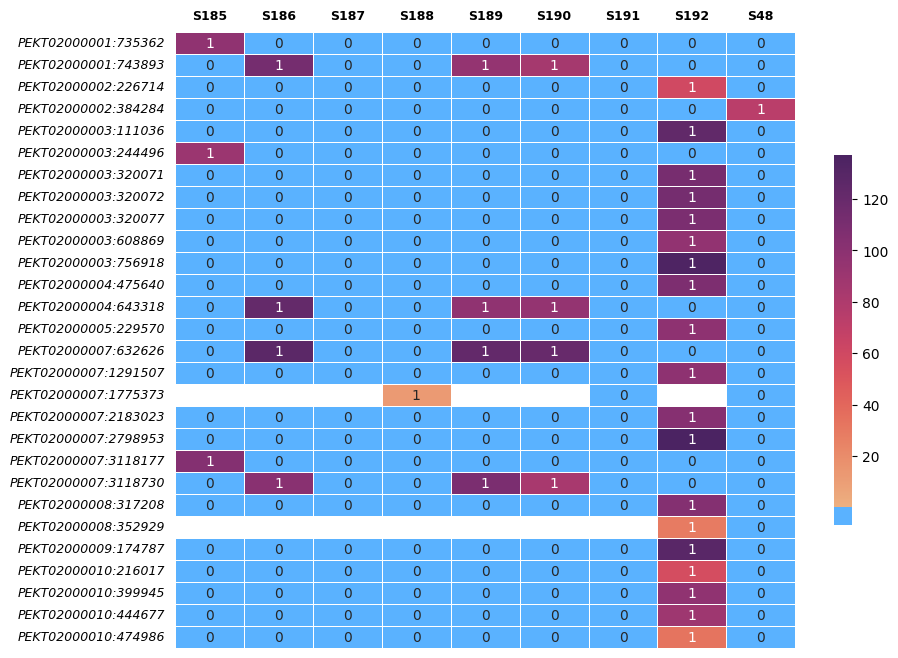

In [10]:
# Heatmap of SNP profile
plt.figure(figsize = (10, 8))
my_cmap = sns.color_palette("flare", as_cmap = True).copy()
my_cmap.set_under("#5AB2FF")
ax = sns.heatmap(snp_of_strain_df, annot = ann_snp_of_strain_df, fmt = "", cmap = my_cmap, square = False,
                 linewidth = 0.5, linecolor = "white", mask = snp_of_strain_df.isnull(),
                 cbar_kws = {"shrink": 0.6, "extend": "min", "extendrect": True},
                 vmin = 0.1
                 )
ax.set(xlabel = "", ylabel = "")
ax.xaxis.tick_top()
plt.xticks(weight = "bold", fontsize = 9, fontfamily = "sans-serif")
plt.yticks(fontsize = 9, fontfamily = "sans-serif", style = "italic")
plt.tick_params(
    axis = "x",
    which = "both",
    top = False
)
plt.tick_params(
    axis = "y",
    which = "both",
    left = False
)
# plt.savefig("snp_heatmap.pdf", format = "pdf", bbox_inches = "tight", dpi = 300)
# plt.savefig("wgs_snp_heatmap.png", format = "png", bbox_inches = "tight", dpi = 300)
plt.show()